In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [9]:
df.shape

(4600, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [10]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [11]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [12]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


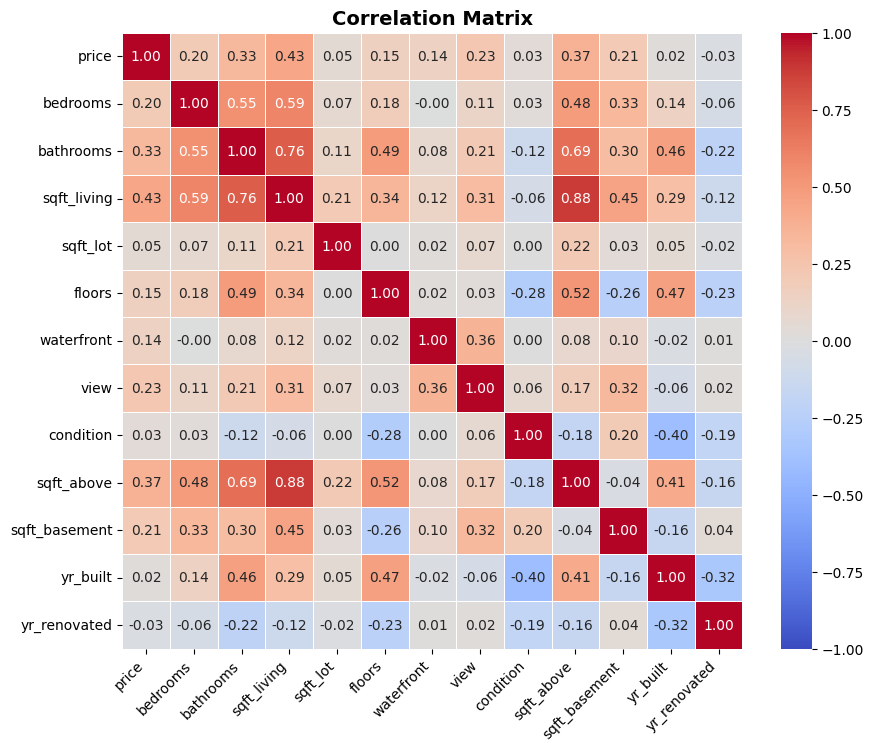

In [27]:
df_corr = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.show()

In [28]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [31]:
columns_to_remove = ['date','yr_renovated','street','city','statezip','country']
df = df.drop(columns=columns_to_remove)

In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976


In [33]:
import scipy.stats as stats
z_scores = stats.zscore(df)
threshold = 3
print("Size before removing outliers", df.shape)
outliers_df = df[(z_scores>threshold).any(axis = 1)]
df = df[(z_scores <= threshold).all(axis = 1)]
print("Size after removing outliers", df.shape)

Size before removing outliers (4600, 12)
Size after removing outliers (4244, 12)


In [34]:
outliers_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921
56,491500.0,4,1.75,2190,125452,1.0,0,2,3,2190,0,1968
100,736500.0,4,2.50,3180,21904,2.0,0,3,3,3180,0,2000
107,1090000.0,4,2.50,4340,141570,2.5,0,0,3,4340,0,1992
118,1030000.0,5,2.75,3190,16920,1.0,0,3,3,1690,1500,1976


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df), columns =df.columns)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

In [37]:
X = df.drop('price',axis = 1)
y = df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42 )

In [38]:
print(f"'xtrain {X_train.shape}")
print(f"'xtest {X_test.shape}")

'xtrain (3183, 11)
'xtest (1061, 11)


In [39]:
models = [
    ('Random Forest',RandomForestRegressor()),
    ('Linear Regressor', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('KNN', KNeighborsRegressor())
] 

In [40]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
for name, model in models:
    print(name)
    print()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Mean Squared Error :",mean_squared_error(y_test,y_pred))
    print('\n')
    print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
    print('\n')
    print("R-squared (R2)",r2_score(y_test,y_pred))
    print('\n')